<a href="https://colab.research.google.com/github/DanielaManate/SentimentAnalysis_MADC_UBB/blob/master/SA2_Lexical_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Convert text to vectors of numbers => document-term-matrix
from sklearn.feature_extraction.text import CountVectorizer

# for tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# plots
import matplotlib.pyplot as plt

# for wordlcloud graphs
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
path = 'gdrive/My Drive/Colab Notebooks/Data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Reading Dataset

In [3]:
reviews = pd.read_csv(path + 'Input/2.input_data_prepped.csv')
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server


In [4]:
reviews.dtypes

rest_id       object
text          object
rating         int64
char_count     int64
positive       int64
text_prep     object
dtype: object

In [0]:
# Convert text_prep to string to counteract issues later
reviews['text_prep'] = reviews['text_prep'].astype(str)

# Lexical Complexity
- Word Frequency: number of words per corpus. Top Words
- Word Length: average length of individual words in a text
- Lexical Diversity: number of unique words used in a text
- Lexical Density: the number of unique words divided by the total number of words (word repetition)

# Bag of Words - Top 6000

In [6]:
len(reviews)

9365

Matrix VS Array
- matrices are strictly 2-dimensional 
- numpy arrays (ndarrays) are N-dimensional.

DF VS Array
- DF = 2-dimensional array with labeled axes (matrix with column names for columns, and index labels for rows)
- A single column or row in a Pandas DataFrame is a Pandas series — a one-dimensional array with axis labels

Sparse Matrix
= Matrices that contain mostly zero values are called sparse, distinct from matrices where most of the values are non-zero, called dense.

Compressed Sparse Row Matrix: a compressed matrix, to save space (contains one vector for index pointers, one vector for indexes, one vector with data, does not save 0s)

Converting compressed sparse matrix to
- dense matrix: counts_per_review.todense()
- array: counts_per_review.toarray()


### Create a document-term-matrix

In [0]:
# max_features = If not None, build a vocabulary that only consider the top 
# max_features ordered by term frequency across the corpus.

# construct the vocab on most frequent 6000 words
vec = CountVectorizer(max_features = 6000)

# creates a matrix with rows = documents, cols = words
counts_per_review = vec.fit_transform(reviews.text_prep)

# the 6000 words => will become the name of the cols
review_words = vec.get_feature_names()

dtm = pd.DataFrame(counts_per_review.toarray(), 
                   columns=review_words)

In [8]:
dtm.head()

,aaabar,aaron,abacus,ability,able,absolute,absolutely,absurd,abundance,abundant,ac,acai,accent,accept,acceptable,acceptance,access,accessible,accident,accidentally,accommodate,accommodating,accommodation,accomodate,accompaniment,accompany,accord,accordingly,accordion,account,accuracy,accurate,accuse,ace,ache,achieve,acidic,acknowledge,acknowledgement,acoustic,...,yen,yep,yes,yesterday,yet,yike,yo,yogurt,yoke,yolk,york,yorker,young,younger,youngster,youth,yr,yrs,yuck,yum,yumm,yumminess,yummm,yummmm,yummo,yummy,yup,zach,zack,zero,zesty,zillion,zipps,ziti,zoe,zone,zucchini,zuchinni,zupa,zupas
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
dtm['pron']

0       1
1       0
2       0
3       0
4       0
       ..
9360    0
9361    0
9362    0
9363    0
9364    0
Name: pron, Length: 9365, dtype: int64

In [10]:
# Delete pron column
del dtm['pron']
dtm.shape

(9365, 5999)

In [11]:
reviews.text_prep.iloc[250]

'third time drop star guess new spot care service wait food joke doubt come back third time charm'

In [12]:
dtm['third'].iloc[250]

2

In [13]:
# Count number of words in text prep
reviews['text_prep_tokens'] = reviews['text_prep'].apply(word_tokenize)
reviews['word_len_prep'] = reviews['text_prep_tokens'].apply(len)
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...,"[eaten, twice, lunch, first, time, french, dip...",75
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7


### Create a new column, text_prep_lim, that contains only the words in BoW

Lambda Function: anonymous function (a function that is defined without a name => we don't use def)

In [14]:
reviews['text_prep_lim_tokens'] = reviews['text_prep_tokens'].apply(lambda x: 
                                                   [word for word in x if word in review_words])
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,"[arrived, reservation, pm, seat, right, time, ..."
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,..."
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15,"[breakfast, delicious, waitress, awesome, stea..."
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...,"[eaten, twice, lunch, first, time, french, dip...",75,"[eaten, twice, lunch, first, time, french, dip..."
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7,"[awesome, service, great, food, amazing, server]"


In [15]:
reviews['word_len_prep_lim'] = reviews['text_prep_lim_tokens'].apply(len)
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens,word_len_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,"[arrived, reservation, pm, seat, right, time, ...",25
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,...",9
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15,"[breakfast, delicious, waitress, awesome, stea...",15
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...,"[eaten, twice, lunch, first, time, french, dip...",75,"[eaten, twice, lunch, first, time, french, dip...",74
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7,"[awesome, service, great, food, amazing, server]",6


In [16]:
# # Change output from list of strings to sentence
reviews['text_prep_lim'] = reviews['text_prep_lim_tokens'].apply(lambda x: ' '.join(x))
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens,word_len_prep_lim,text_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,"[arrived, reservation, pm, seat, right, time, ...",25,arrived reservation pm seat right time restura...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,...",9,receive amazing service food cook right waitre...
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15,"[breakfast, delicious, waitress, awesome, stea...",15,breakfast delicious waitress awesome steak egg...
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...,"[eaten, twice, lunch, first, time, french, dip...",75,"[eaten, twice, lunch, first, time, french, dip...",74,eaten twice lunch first time french dip mom fi...
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7,"[awesome, service, great, food, amazing, server]",6,awesome service great food amazing server


In [17]:
reviews['text_prep_lim'].iloc[250]

'third time drop star guess new spot care service wait food joke doubt come back third time charm'

In [18]:
print(reviews.text.iloc[0])
print(reviews.text_prep.iloc[0])
print(reviews.text_prep_lim.iloc[0])

# the word 'croed' & pronoun '-PRON-' are missing from text_prep_lim

We arrived for our reservation at 7:15pm.  They seated us right on time.  The resturant was fairly loud at first but once the family dinner croed cleared out at 7:30pm it quieted down.  The food and service was outstanding, and at a very reasonable price.  I highly recommend Mimi's very a late dinner.
arrived reservation pm seat -PRON- right time resturant fairly loud first family dinner croed clear pm quiet food service outstanding reasonable price highly recommend mimi late dinner
arrived reservation pm seat right time resturant fairly loud first family dinner clear pm quiet food service outstanding reasonable price highly recommend mimi late dinner


In [19]:
reviews.columns
reviews = reviews[['rest_id', 'text', 'rating', 'char_count', 'positive', 
                   'text_prep', 'text_prep_tokens', 'word_len_prep', 
                   'text_prep_lim', 'text_prep_lim_tokens','word_len_prep_lim']]
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim,text_prep_lim_tokens,word_len_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,arrived reservation pm seat right time restura...,"[arrived, reservation, pm, seat, right, time, ...",25
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",9


### Save BOW DTM to csv

In [0]:
dtm.to_csv(path + 'Output/1.dtm_1_bow.csv', index=False)

In [0]:
reviews.to_csv(path + 'Input/3.input_data_prepped_bow.csv', 
               index = False)

# Word Cloud

In [22]:
dtm.head()

,aaabar,aaron,abacus,ability,able,absolute,absolutely,absurd,abundance,abundant,ac,acai,accent,accept,acceptable,acceptance,access,accessible,accident,accidentally,accommodate,accommodating,accommodation,accomodate,accompaniment,accompany,accord,accordingly,accordion,account,accuracy,accurate,accuse,ace,ache,achieve,acidic,acknowledge,acknowledgement,acoustic,...,yen,yep,yes,yesterday,yet,yike,yo,yogurt,yoke,yolk,york,yorker,young,younger,youngster,youth,yr,yrs,yuck,yum,yumm,yumminess,yummm,yummmm,yummo,yummy,yup,zach,zack,zero,zesty,zillion,zipps,ziti,zoe,zone,zucchini,zuchinni,zupa,zupas
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Axis 0 will act on all the ROWS in each COLUMN
- Axis 1 will act on all the COLUMNS in each ROW

In [23]:
word_cloud_freq = dtm.sum(axis=0)
word_cloud_freq

aaabar        4
aaron        11
abacus        5
ability       9
able        159
           ... 
zone          5
zucchini     20
zuchinni      3
zupa          5
zupas         2
Length: 5999, dtype: int64

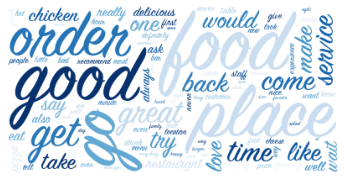

In [24]:
wordcloud = WordCloud(max_words=100, 
                      background_color="white",
                      font_path = path + 'Input/SignPainter.ttc',
                      colormap="Blues")
wordcloud.generate_from_frequencies(word_cloud_freq)
plt.imshow(wordcloud)
# Turn off axis lines and labels
plt.axis("off")
plt.show()

# Word Cloud Positive - Top 20

In [25]:
dtm_pos = dtm[reviews['positive']==1].copy()
dtm_pos.shape

(6526, 5999)

In [0]:
word_cloud_freq_pos = dtm_pos.sum(axis=0)

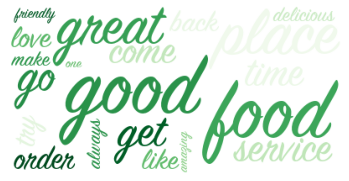

In [27]:
wordcloud = WordCloud(max_words=20,
                      background_color="white",
                      font_path = path + 'Input/SignPainter.ttc',
                      colormap="Greens")

wordcloud.generate_from_frequencies(word_cloud_freq_pos)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
wordcloud.words_
# 8 of the 20 words are positive words
# always, amazing, delicious, friendly, good, great, like, love

{'always': 0.31927985414767546,
 'amazing': 0.2876025524156791,
 'back': 0.41134913400182316,
 'come': 0.48997265268915224,
 'delicious': 0.3612123974475843,
 'food': 0.9899726526891522,
 'friendly': 0.31289881494986327,
 'get': 0.5271194165907019,
 'go': 0.5656335460346399,
 'good': 1.0,
 'great': 0.8776207839562443,
 'like': 0.3735186873290793,
 'love': 0.4416590701914312,
 'make': 0.35642661804922515,
 'one': 0.29626253418413856,
 'order': 0.477894257064722,
 'place': 0.904968094804011,
 'service': 0.5198268003646308,
 'time': 0.49134001823154055,
 'try': 0.4029170464904284}

# Word Cloud Negative - Top 20

In [29]:
dtm_neg = dtm[reviews['positive']==0].copy()
dtm_neg.shape

(2839, 5999)

In [30]:
word_cloud_freq_neg = dtm_neg.sum(axis=0)
word_cloud_freq_neg

aaabar       0
aaron        1
abacus       1
ability      4
able        59
            ..
zone         1
zucchini     9
zuchinni     0
zupa         2
zupas        1
Length: 5999, dtype: int64

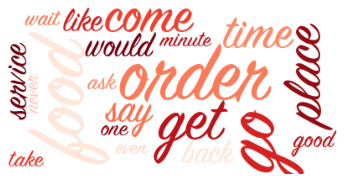

In [31]:
wordcloud = WordCloud(max_words=20,
                      background_color="white",
                      font_path = path + 'Input/SignPainter.ttc',
                      colormap="Reds")
wordcloud.generate_from_frequencies(word_cloud_freq_neg)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
wordcloud.words_

{'ask': 0.44871794871794873,
 'back': 0.4911858974358974,
 'come': 0.6233974358974359,
 'even': 0.32892628205128205,
 'food': 0.999198717948718,
 'get': 0.8858173076923077,
 'go': 0.8950320512820513,
 'good': 0.4823717948717949,
 'like': 0.48998397435897434,
 'minute': 0.37099358974358976,
 'never': 0.3249198717948718,
 'one': 0.43990384615384615,
 'order': 1.0,
 'place': 0.657051282051282,
 'say': 0.5420673076923077,
 'service': 0.5120192307692307,
 'take': 0.46033653846153844,
 'time': 0.6213942307692307,
 'wait': 0.40625,
 'would': 0.5212339743589743}

In [33]:
wordcloud.words_
# 1 of the 20 words is negative, 2 are positive
# wait
# good, like

{'ask': 0.44871794871794873,
 'back': 0.4911858974358974,
 'come': 0.6233974358974359,
 'even': 0.32892628205128205,
 'food': 0.999198717948718,
 'get': 0.8858173076923077,
 'go': 0.8950320512820513,
 'good': 0.4823717948717949,
 'like': 0.48998397435897434,
 'minute': 0.37099358974358976,
 'never': 0.3249198717948718,
 'one': 0.43990384615384615,
 'order': 1.0,
 'place': 0.657051282051282,
 'say': 0.5420673076923077,
 'service': 0.5120192307692307,
 'take': 0.46033653846153844,
 'time': 0.6213942307692307,
 'wait': 0.40625,
 'would': 0.5212339743589743}

# Word Frequency

In [34]:
# Most Frequent Words
word_freq = pd.DataFrame(dtm.sum(axis=0)).reset_index()
word_freq.head()

,index,0
0,aaabar,4
1,aaron,11
2,abacus,5
3,ability,9
4,able,159


In [35]:
word_freq.columns = ['Word', 'Count']
word_freq.head()

,Word,Count
0,aaabar,4
1,aaron,11
2,abacus,5
3,ability,9
4,able,159


In [36]:
word_freq = word_freq.sort_values(by = 'Count', 
                                  ascending = False)
word_freq.head()

,Word,Count
2061,food,6838
3950,place,5611
2263,good,5592
2251,go,4716
3649,order,4593


In [37]:
# Plot Top 20 Words
top20 = word_freq[0:20].copy()
top20.head()

,Word,Count
2061,food,6838
3950,place,5611
2263,good,5592
2251,go,4716
3649,order,4593


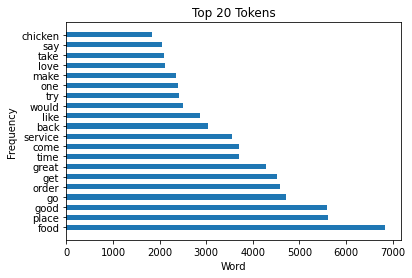

In [38]:
plt.barh(y = top20['Word'], 
         width = top20['Count'], 
         height = 0.5,
         align='center')

plt.title('Top 20 Tokens')
plt.xlabel('Word')
plt.ylabel('Frequency')

plt.show();

# Word Length

In [39]:
# Word Length
word_freq['word_len'] = word_freq['Word'].apply(len)

word_freq.head()

,Word,Count,word_len
2061,food,6838,4
3950,place,5611,5
2263,good,5592,4
2251,go,4716,2
3649,order,4593,5


In [40]:
word_freq.describe()

,Count,word_len
count,5999.000000,5999.000000
mean,63.204867,6.239040
std,263.008088,2.264416
min,2.000000,2.000000
25%,4.000000,5.000000
50%,9.000000,6.000000
75%,29.000000,8.000000
max,6838.000000,17.000000


In [0]:
# Average word length = 6 chars

# Lexical Diversity: How many unique words in each review?

In [42]:
dtm.head()

,aaabar,aaron,abacus,ability,able,absolute,absolutely,absurd,abundance,abundant,ac,acai,accent,accept,acceptable,acceptance,access,accessible,accident,accidentally,accommodate,accommodating,accommodation,accomodate,accompaniment,accompany,accord,accordingly,accordion,account,accuracy,accurate,accuse,ace,ache,achieve,acidic,acknowledge,acknowledgement,acoustic,...,yen,yep,yes,yesterday,yet,yike,yo,yogurt,yoke,yolk,york,yorker,young,younger,youngster,youth,yr,yrs,yuck,yum,yumm,yumminess,yummm,yummmm,yummo,yummy,yup,zach,zack,zero,zesty,zillion,zipps,ziti,zoe,zone,zucchini,zuchinni,zupa,zupas
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# For each doc, count number of unique words
# <=> count how many columns have non-zero values
lexical = pd.DataFrame(data=np.count_nonzero(dtm, axis=1),
                       columns = ['Unique Words'])
lexical.head()

,Unique Words
0,23
1,9
2,14
3,56
4,6


In [44]:
lexical['Total Words'] = dtm.sum(axis=1)
lexical.head()

,Unique Words,Total Words
0,23,25
1,9,9
2,14,15
3,56,74
4,6,6


In [45]:
reviews['text_prep_lim'].iloc[0]
# dinner & pm appear twice;

'arrived reservation pm seat right time resturant fairly loud first family dinner clear pm quiet food service outstanding reasonable price highly recommend mimi late dinner'

In [46]:
lexical.describe()

,Unique Words,Total Words
count,9365.000000,9365.000000
mean,33.668340,40.487560
std,24.716716,35.876595
min,1.000000,1.000000
25%,17.000000,18.000000
50%,27.000000,30.000000
75%,42.000000,50.000000
max,251.000000,406.000000


In [0]:
# On avg, 34 unique words per review, 40 total words per review

In [48]:
lexical['positive']=reviews['positive'].copy()
lexical.head()

,Unique Words,Total Words,positive
0,23,25,1
1,9,9,1
2,14,15,1
3,56,74,1
4,6,6,1


In [49]:
lexical.groupby('positive').mean()

,Unique Words,Total Words
positive,,
0,41.464248,52.538218
1,30.276892,35.245173


In [0]:
# On avg, 42 unique words per negative review, 30 unique words per positive review
# On avg, 53 total words per negative review, 35 unique words per positive review

# Lexical Density: Unique Words / Total Words

In [0]:
# As lexical density increases, repetition decreases. 

In [52]:
lexical.head()

,Unique Words,Total Words,positive
0,23,25,1
1,9,9,1
2,14,15,1
3,56,74,1
4,6,6,1


In [53]:
lexical['Density'] = lexical['Unique Words']/lexical['Total Words']
lexical.head()

,Unique Words,Total Words,positive,Density
0,23,25,1,0.920000
1,9,9,1,1.000000
2,14,15,1,0.933333
3,56,74,1,0.756757
4,6,6,1,1.000000


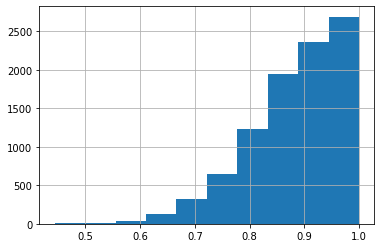

In [54]:
lexical['Density'].hist()

In [55]:
lexical.groupby('positive').mean()

,Unique Words,Total Words,Density
positive,,,
0,41.464248,52.538218,0.847234
1,30.276892,35.245173,0.901532


In [0]:
# Positive Reviews have larger density, which suggests lower repetition. 

# Insights

Conclusions
- Negative reviews have a larger average number of unique and total words, which suggests that users leave a longer review when they have negative feedback
- Negative reviews have a lower density, which suggests that users tend to repeat words when they have negative feedback
- The most common 20 words in negative reviews are not negative words (except one word - 'wait'), while almost half of the most common 20 words in positive reviews are positive words. Negations (e.g. 'not good') greatly affect Sentiment Analysis, and we extracted words like 'not' using stopwords from reviews.